In [16]:
import pandas as pd, numpy as np
pd.set_option('display.max_columns', 100)

In [29]:
#consolidate partitioned csv files into single DF per airline
AA = pd.concat([pd.read_csv('../Datasets/AA-1.txt', sep=';', low_memory=False), 
                pd.read_csv('../Datasets/AA-2.txt', sep=';', low_memory=False),
                pd.read_csv('../Datasets/AA-3.txt', sep=';', low_memory=False),
                pd.read_csv('../Datasets/AA-4.txt', sep=';', low_memory=False),
                pd.read_csv('../Datasets/AA-5.txt', sep=';', low_memory=False), 
                pd.read_csv('../Datasets/AA-6.txt', sep=';', low_memory=False),
                pd.read_csv('../Datasets/AA-7.txt', sep=';', low_memory=False),
                pd.read_csv('../Datasets/AA-8.txt', sep=';', low_memory=False)],
                axis=0, 
                ignore_index=True
              )

# no_name, empty field. Will drop from every airline dataframe
AA.drop('no_name', axis=1, inplace=True)

pop_size = 15927485 #total size of flights table
pop_sample_size = 100000 #total size of final population sample (inlcudes all airlines)


AA_sample_size = int(pop_sample_size/pop_size * len(AA))

In [30]:
AA_sample_size

25986

In [31]:
#create seperate dataset for object types and numerical types
#this will help in checking if sample is a good representation of population
AA_obj = AA.select_dtypes(include='object')
AA_num = AA.select_dtypes(include=['int64', 'float'])

from sklearn.utils import shuffle
AA_num_sample, AA_obj_sample = shuffle(AA_num, 
                                       AA_obj,
                                       n_samples=AA_sample_size,
                                       random_state=120
                                      )

In [60]:
len(AA_num_sample.columns)

29

In [55]:
for i,j in enumerate(AA_num_sample.columns):
    print(i,j)

0 mkt_carrier_fl_num
1 op_carrier_fl_num
2 origin_airport_id
3 dest_airport_id
4 crs_dep_time
5 dep_time
6 dep_delay
7 taxi_out
8 wheels_off
9 wheels_on
10 taxi_in
11 crs_arr_time
12 arr_time
13 arr_delay
14 cancelled
15 diverted
16 crs_elapsed_time
17 actual_elapsed_time
18 air_time
19 flights
20 distance
21 carrier_delay
22 weather_delay
23 nas_delay
24 security_delay
25 late_aircraft_delay
26 first_dep_time
27 total_add_gtime
28 longest_add_gtime


In [ ]:
#create seperate dataset for object types and numerical types
#this will help in checking if sample is a good representation of population
AA_obj = AA.select_dtypes(include='object')
AA_num = AA.select_dtypes(include=['int64', 'float'])

from sklearn.utils import shuffle
AA_num_sample, AA_obj_sample = shuffle(AA_num, 
                                       AA_obj,
                                       n_samples=AA_sample_size,
                                       random_state=120
                                      )


for i,j in enumerate(AA_num_sample.columns):
    print(i,j)


import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 200))
plot = 1
for i,j in enumerate(AA_num_sample.columns):
        plt.subplot(len(AA_num_sample.columns), 2, plot)
        plt.hist(AA_num_sample[j])
        plt.title(f'{AA_num_sample.columns[i]} (Sample)')
        plot += 1
        
        plt.subplot(len(AA_num_sample.columns), 2, plot)
        plt.hist(AA_num[j])
        plt.title(f'{AA_num.columns[i]} (Population)')
        plot += 1
        
plt.tight_layout()

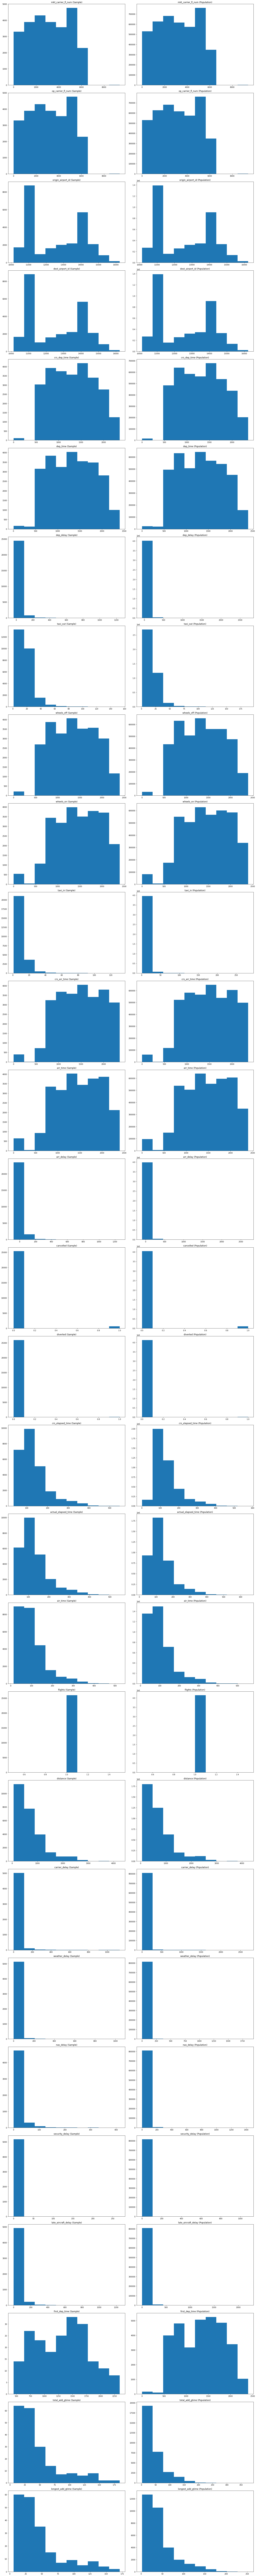

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 200))
plot = 1
for i,j in enumerate(AA_num_sample.columns):
        plt.subplot(len(AA_num_sample.columns), 2, plot)
        plt.hist(AA_num_sample[j])
        plt.title(f'{AA_num_sample.columns[i]} (Sample)')
        plot += 1
        
        plt.subplot(len(AA_num_sample.columns), 2, plot)
        plt.hist(AA_num[j])
        plt.title(f'{AA_num.columns[i]} (Population)')
        plot += 1
        
plt.tight_layout()